<a href="https://colab.research.google.com/github/gouse95/ANN_Basics/blob/main/ANN_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import tensorflow as tf

In [49]:
tf.__version__

'2.6.0'

In [50]:
tf.keras.__version__

'2.6.0'

In [51]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [52]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [54]:
mnist = tf.keras.datasets.mnist

In [55]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [56]:
(X_train_full, y_train_full),(X_test, y_test)=mnist.load_data()

In [57]:
X_train_full.shape

(60000, 28, 28)

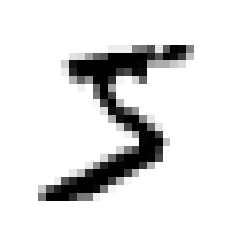

In [58]:
img = X_train_full[0]
plt.imshow(img, cmap="binary")
plt.axis("off")
plt.show()

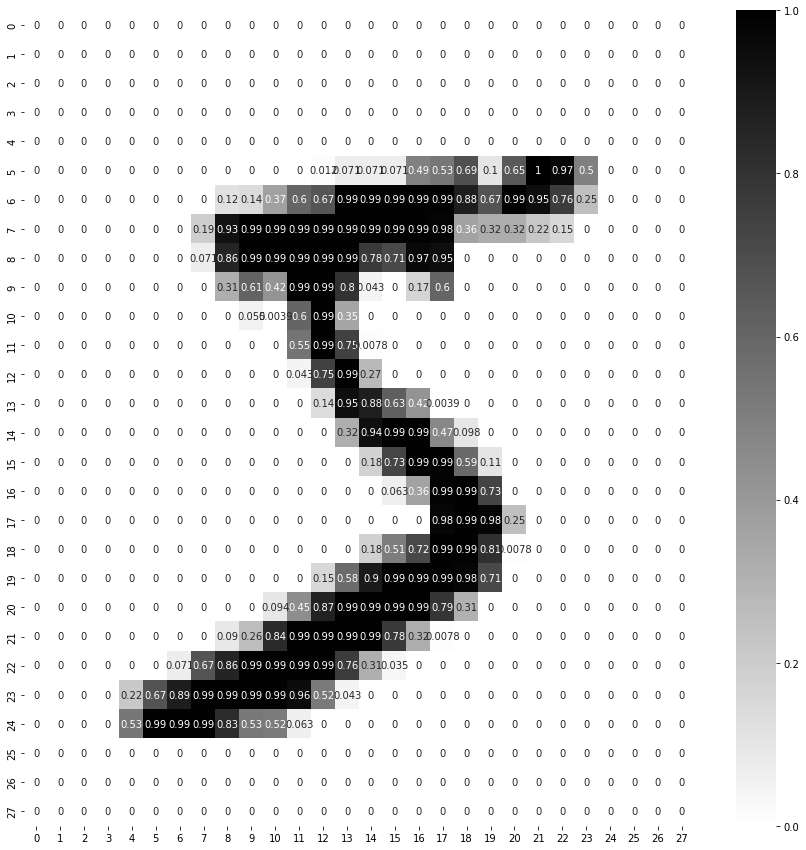

In [59]:
plt.figure(figsize=(15,15))
sns.heatmap(img/255, annot=True,cmap="binary")

In [60]:
 X_test.shape

(10000, 28, 28)

In [61]:
X_valid, X_train = X_train_full[:5000] / 255.,X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test =X_test/255

In [62]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28,28],name="InputLayer"),
          tf.keras.layers.Dense(300,activation="relu",name="HiddenLayer1"),
          tf.keras.layers.Dense(100,activation="relu",name="HiddenLayer2"),
          tf.keras.layers.Dense(10,activation="softmax",name="OutputLayer")
]

In [63]:
model_clf =tf.keras.models.Sequential(LAYERS)

In [64]:
model_clf.layers

In [65]:
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
HiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
OutputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [66]:
# firstlayer * secondlayer + bias

784*300+300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [67]:
model_clf.layers[1].name

'HiddenLayer1'

In [68]:
weights,biases=model_clf.layers[1].get_weights()

In [69]:
weights.shape

(784, 300)

In [70]:
biases.shape

(300,)

In [71]:
LOSS_FUNCTION="sparse_categorical_crossentropy"
OPTIMIZER="SGD"
METRICS=["accuracy"]
model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER,metrics=METRICS)

In [72]:
EPOCHS=30
VALIDATION=(X_valid,y_valid)

history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6170 - accuracy: 0.8429 - val_loss: 0.3120 - val_accuracy: 0.9172
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2910 - accuracy: 0.9168 - val_loss: 0.2445 - val_accuracy: 0.9322
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2385 - accuracy: 0.9322 - val_loss: 0.2095 - val_accuracy: 0.9422
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2035 - accuracy: 0.9421 - val_loss: 0.1795 - val_accuracy: 0.9516
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1780 - accuracy: 0.9495 - val_loss: 0.1623 - val_accuracy: 0.9558
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1578 - accuracy: 0.9554 - val_loss: 0.1459 - val_accuracy: 0.9616
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1414 - accuracy: 0.9596 - val_loss: 0.1345 - val_accuracy:

In [73]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [74]:
history.history

{'accuracy': [0.8429272770881653,
  0.9167818427085876,
  0.9321818351745605,
  0.9420545697212219,
  0.9494909048080444,
  0.9554181694984436,
  0.9595999717712402,
  0.9636545181274414,
  0.9671090841293335,
  0.9695272445678711,
  0.9725090861320496,
  0.9748727083206177,
  0.9765636324882507,
  0.9785636067390442,
  0.9798545241355896,
  0.9813272953033447,
  0.9826727509498596,
  0.9842363595962524,
  0.9851636290550232,
  0.9861090779304504,
  0.987672746181488,
  0.988490879535675,
  0.9892545342445374,
  0.9900363683700562,
  0.9901999831199646,
  0.990818202495575,
  0.9920908808708191,
  0.9927091002464294,
  0.9931636452674866,
  0.9934727549552917],
 'loss': [0.6170014142990112,
  0.2910059690475464,
  0.2384977638721466,
  0.20348592102527618,
  0.17800123989582062,
  0.157823383808136,
  0.14138644933700562,
  0.1275523602962494,
  0.11558882147073746,
  0.10568660497665405,
  0.09726125001907349,
  0.08963682502508163,
  0.08293931186199188,
  0.07694131880998611,
  0.07

In [75]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.617001,0.842927,0.312035,0.9172
1,0.291006,0.916782,0.244482,0.9322
2,0.238498,0.932182,0.209518,0.9422
3,0.203486,0.942055,0.179475,0.9516
4,0.178001,0.949491,0.162277,0.9558
5,0.157823,0.955418,0.145904,0.9616
6,0.141386,0.959600,0.134535,0.9658
7,0.127552,0.963655,0.125461,0.9670
8,0.115589,0.967109,0.115578,0.9694
9,0.105687,0.969527,0.108792,0.9698


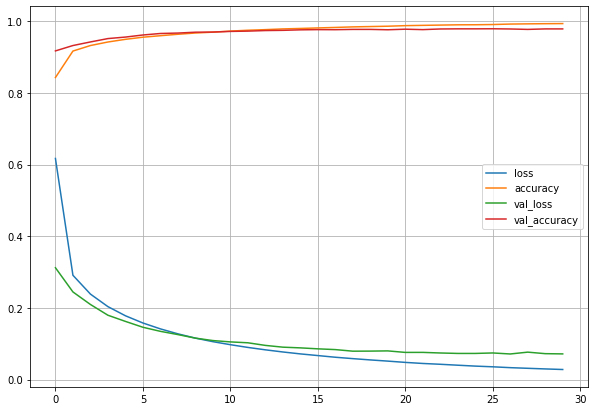

In [76]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [77]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0715 - accuracy: 0.9775


[0.07153919339179993, 0.9775000214576721]

In [78]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)

y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.   ]], dtype=float32)

In [79]:
y_prob.shape

(3, 10)

In [80]:
y_prob

array([[1.1165778e-06, 1.9583736e-08, 3.5137095e-05, 1.0805331e-04,
        1.9589375e-08, 9.3466205e-08, 6.0649437e-12, 9.9984467e-01,
        3.4383279e-06, 7.4111026e-06],
       [2.3019045e-07, 3.3643646e-05, 9.9989522e-01, 6.8646128e-05,
        1.1621061e-12, 1.9639123e-07, 5.0933085e-08, 1.1131366e-11,
        1.9808158e-06, 6.8420530e-12],
       [5.5413329e-07, 9.9864703e-01, 6.6136461e-05, 2.6474207e-05,
        8.5032567e-05, 6.7073612e-05, 3.0925486e-05, 7.1063876e-04,
        3.5145265e-04, 1.4603110e-05]], dtype=float32)

In [81]:
Y_pred= np.argmax(y_prob, axis=-1)
Y_pred

array([7, 2, 1])

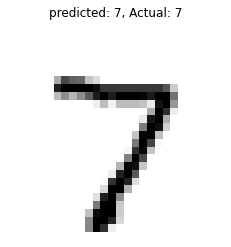

------------------------------


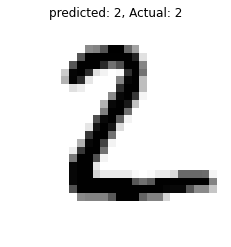

------------------------------


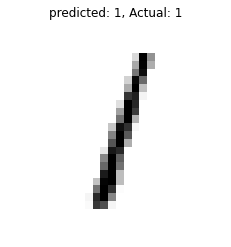

------------------------------


In [82]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
  plt.imshow(img_array, cmap="binary")
  plt.title(f"predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("---"*10)